In [1]:
import os
import scipy
import numpy as np
import pandas as pd
import sympy as sp
import seaborn as sns

from matplotlib import pyplot as plt

%matplotlib inline

# 忽略所有警告
import warnings
#warnings.simplefilter("ignore")

In [2]:
root = "./"
data_folder = os.path.join(root, "datasets/")

# 1. Corn Price

In [3]:
corn_folder = os.path.join(data_folder, "Weekly_corn_price/")
corn_13_17_path = os.path.join(corn_folder, "corn2013-2017.txt")
corn_15_17_path = os.path.join(corn_folder, "corn2015-2017.txt")
OHLC_13_17_path = os.path.join(corn_folder, "corn_OHLC2013-2017.txt")

## 1.1 读取数据

In [4]:
corn_13_17 = pd.read_csv(corn_13_17_path, header=None)
corn_13_17.columns = ["Date", "Price"]

corn_15_17 = pd.read_csv(corn_15_17_path, header=None)
corn_15_17.columns = ["Date", "Price"]

OHLC_13_17 = pd.read_csv(OHLC_13_17_path, header=None)
OHLC_13_17.columns = ["Date", "Open Price", "High Price", "Low Price", "Close Price"]

In [5]:
OHLC_13_17.head(5)

,Date,Open Price,High Price,Low Price,Close Price
0,2013-01-06,7.859275,7.900275,7.751150,7.794975
1,2013-01-13,7.801200,7.927280,7.757640,7.863400
2,2013-01-20,8.196460,8.277900,8.156880,8.234920
3,2013-01-27,8.205650,8.252325,8.135675,8.176650
4,2013-02-03,8.274520,8.355340,8.236040,8.317480


## 1.2 将日期处理成整数（以2013-01-06为第0天）

In [6]:
def ProcessDate(table: pd.DataFrame):
    start_date = pd.to_datetime("2013-01-06")
    tmp_df = table.copy()
    tmp_df["Date"] = ((pd.to_datetime(tmp_df["Date"]) - start_date)/pd.Timedelta(1, "D")).astype(int)

    return tmp_df

In [7]:
corn_13_17 = ProcessDate(corn_13_17)
corn_15_17 = ProcessDate(corn_15_17)
OHLC_13_17 = ProcessDate(OHLC_13_17)

In [8]:
OHLC_13_17.head(5)

,Date,Open Price,High Price,Low Price,Close Price
0,0,7.859275,7.900275,7.751150,7.794975
1,7,7.801200,7.927280,7.757640,7.863400
2,14,8.196460,8.277900,8.156880,8.234920
3,21,8.205650,8.252325,8.135675,8.176650
4,28,8.274520,8.355340,8.236040,8.317480


## 1.3 数据可视化

### 1.3.1 走势图

In [9]:
def PlotTable(table: pd.DataFrame, title):
    columns = table.columns
    dates = table[columns[0]]

    colors = ["red", "orange", "green", "blue", "purple", "black"]

    plt.figure(figsize = (10, 5))
    plt.title("Visualization of %s"%(title))
    for i, item in enumerate(columns[1:]):
        plt.plot(dates, table[item], "-", color = colors[i], label = item)
    plt.legend()
    plt.grid(True)
    plt.xlabel("Dates")
    plt.ylabel("Value")
    plt.show()

    if(len(columns) > 2):
        corr = table.iloc[:, 1:].corr()
        plt.Figure(figsize = (5, 5))
        plt.title("Heatmap of %s"%(title))
        sns.heatmap(corr)
        plt.show()

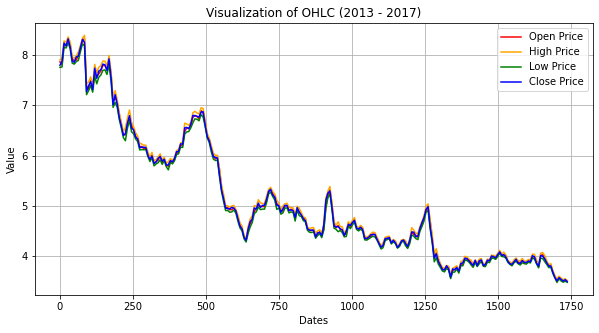

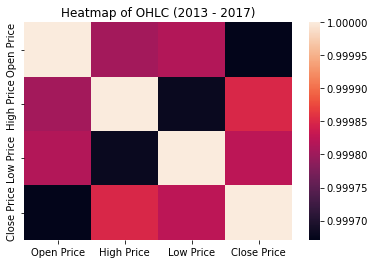

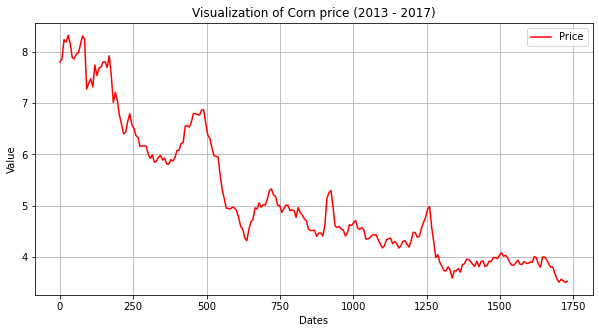

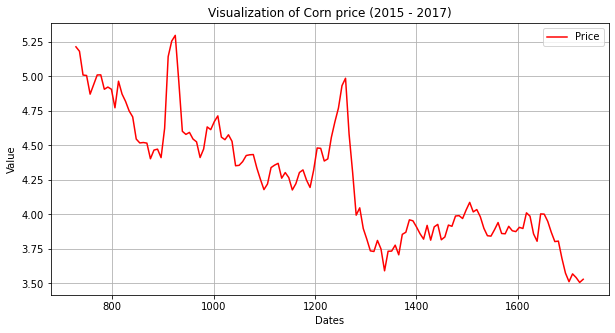

In [10]:
PlotTable(OHLC_13_17, "OHLC (2013 - 2017)")
PlotTable(corn_13_17, "Corn price (2013 - 2017)")
PlotTable(corn_15_17, "Corn price (2015 - 2017)")

### 1.3.2 看每日的波动

第$t$周的变化率：

$\Delta Price(t) = \frac{Price(t) - Price(t - 1)}{Price(t - 1)}$

$\Delta HighPrice(t) = \frac{HighPrice(t) - Price(t)}{Price(t)}$

$\Delta LowPrice(t) = \frac{LowPrice(t) - Price(t)}{Price(t)}$

$\Delta OpenPrice(t) = \frac{OpenPrice(t) - Price(t)}{Price(t)}$

$\Delta ClosePrice(t) = \frac{ClosePrice(t) - Price(t)}{Price(t)}$

In [11]:
delta_price = corn_13_17.copy()
delta_price.columns = ["Date", "Delta Price"]
delta_price["Delta Price"][0] = 0
delta_price["Delta Price"][1:] = np.array(corn_13_17["Price"][1:]) - np.array(corn_13_17["Price"][:-1])

/tmp/ipykernel_1182/3803741620.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delta_price["Delta Price"][0] = 0
/tmp/ipykernel_1182/3803741620.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delta_price["Delta Price"][1:] = np.array(corn_13_17["Price"][1:]) - np.array(corn_13_17["Price"][:-1])


In [12]:
price_diff = OHLC_13_17.copy().iloc[:-1, :]
column = ["Date"]
column.extend(["Delta " + name for name in price_diff.columns[1:]])
price_diff.columns = column
for col in price_diff.columns[1:]:
    price_diff[col] = (price_diff[col] - corn_13_17["Price"])/corn_13_17["Price"]

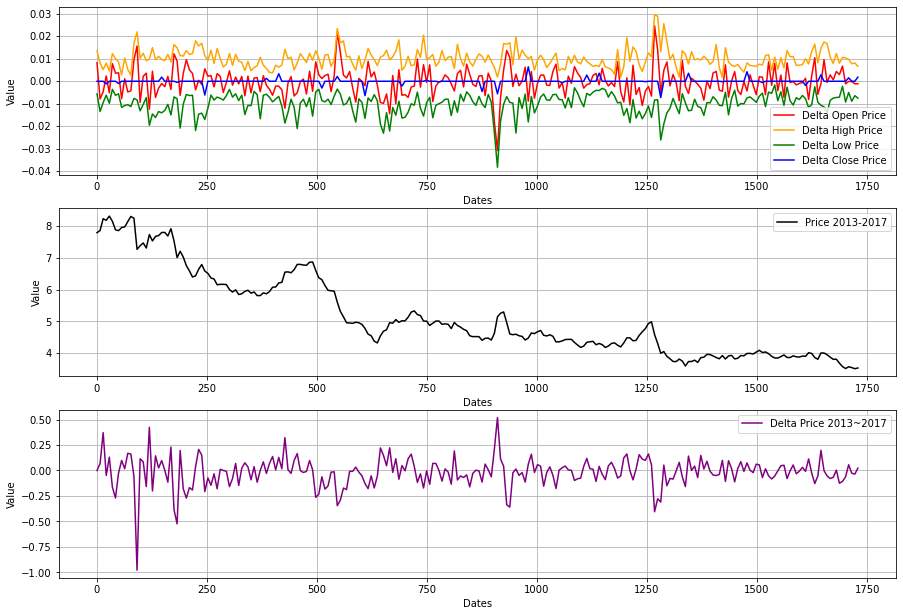

/home/thu-cyf/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/thu-cyf/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/thu-cyf/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

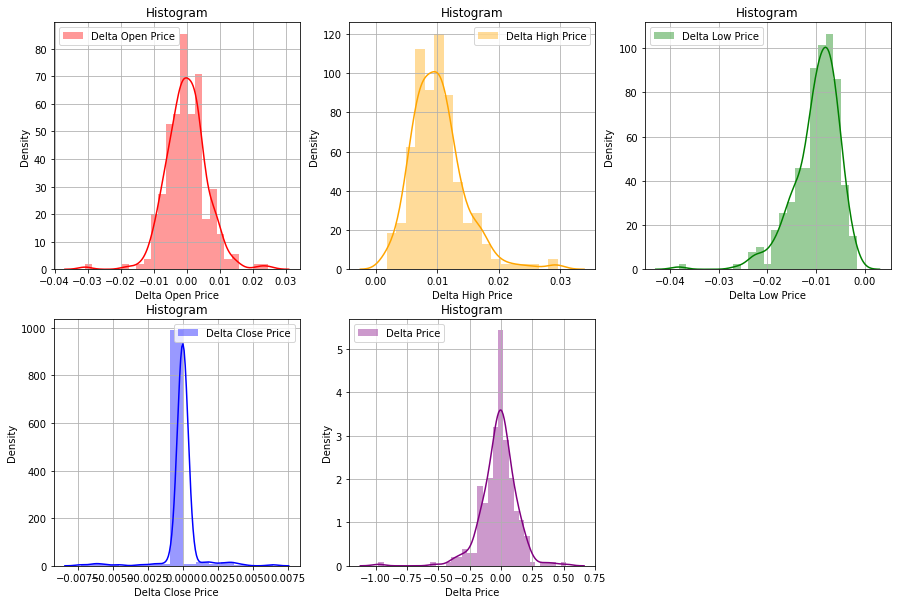

In [13]:
columns = price_diff.columns
dates = price_diff["Date"]

colors = ["red", "orange", "green", "blue", "purple", "black"]

plt.figure(figsize = (15, 14*3/4))
plt.subplot(3,1,1)
for i, item in enumerate(columns[1:]):
    plt.plot(dates, price_diff[item], "-", color = colors[i], label = item)
plt.legend()
plt.grid(True)
plt.xlabel("Dates")
plt.ylabel("Value")

plt.subplot(3,1,2, sharex=plt.gca())
plt.plot(dates, corn_13_17["Price"], "-", color = "black", label = "Price 2013-2017")
plt.legend()
plt.grid(True)
plt.xlabel("Dates")
plt.ylabel("Value")

plt.subplot(3,1,3, sharex=plt.gca())
plt.plot(dates, delta_price["Delta Price"], "-", color = "purple", label = "Delta Price 2013~2017")
plt.legend()
plt.grid(True)
plt.xlabel("Dates")
plt.ylabel("Value")

plt.show()

plt.figure(figsize = (15, 10))
for i, item in enumerate(columns[1:]):
    plt.subplot(2, 3, i+1)
    plt.title("Histogram")
    sns.distplot(price_diff[item], color = colors[i], label = item)
    plt.legend()
    plt.grid(True)
plt.subplot(2, 3, 5) 
plt.title("Histogram")
sns.distplot(delta_price["Delta Price"], color = "purple", label = "Delta Price")
plt.legend()
plt.grid(True)

plt.show()

## 1.4 建模

但看纯粹的玉米价格走势，感觉做一个统计模型很没有意义，最多就是用指数函数拟合一下玉米价格。

于是我开始考虑一个问题：玉米价格有涨有跌，那能否做一个模型来判断当前阶段应该买入还是卖出？转换一下问题，也就是根据当前时刻的开盘价、收盘价、最高价、最低价和价格，来判断此时的玉米价格是处于上升状态还是下降状态？上升状态就可以买入，下降状态就应该卖出。而上升状态和下降状态是不可观测的，属于隐变量。因此很自然地，我们就可以使用隐马尔科夫模型来做估计。

隐状态$S$有两个：上升状态$S = 0$和下降状态$S = 1$。

可观测的状态有5个：$\alpha^{(t)} = \Delta OpenPrice(t), \beta^{(t)} = \Delta ClosePrice(t), \delta^{(t)} = \Delta HighPrice(t), \eta^{(t)} = \Delta LowPrice(t), \gamma^{(t)} = \Delta Price(t)$。

其中，$\alpha, \beta, \gamma$服从正态分布先验，$\mu, -\eta$服从卡方分布先验。

In [14]:
df_column = ["Date", "alpha", "beta", "gamma", "delta", "eta"]
df_data = pd.DataFrame(np.zeros((price_diff.shape[0], 6)))
df_data.columns = df_column
df_data["Date"] = price_diff["Date"]
df_data["alpha"] = price_diff["Delta Open Price"]
df_data["beta"] = price_diff["Delta Close Price"]
df_data["delta"] = price_diff["Delta High Price"]
df_data["eta"] = price_diff["Delta Low Price"]
df_data["gamma"] = delta_price["Delta Price"]
#df_data = df_data.set_index(price_diff["Date"])
df_data

,Date,alpha,beta,gamma,delta,eta
0,0,0.008249,0.000000,0.000000,0.013509,-0.005622
1,7,-0.007910,0.000000,0.068425,0.008124,-0.013450
2,14,-0.004670,0.000000,0.371520,0.005219,-0.009477
3,21,0.002369,-0.001174,-0.048660,0.008070,-0.006179
4,28,-0.005165,0.000000,0.131220,0.004552,-0.009791
...,...,...,...,...,...,...
243,1701,-0.001139,0.000000,-0.062000,0.010391,-0.009253
244,1708,-0.000070,0.001506,0.056500,0.009737,-0.004973
245,1715,-0.000141,0.000000,-0.026500,0.007763,-0.008892
246,1722,-0.001141,0.000000,-0.035500,0.008127,-0.006416


### 1.4.1 模型实现

In [145]:
class HMM():
    def __init__(self, data, is_discrete = True) -> None:
        from scipy.special import gamma
        self.state = np.array([0, 1]).astype(np.int32)
        self.data = data
        self.Date = np.array(data["Date"])
        self.alpha = np.array(data["alpha"])
        self.beta = np.array(data["beta"])
        self.gamma = np.array(data["gamma"])
        self.delta = np.array(data["delta"])
        self.eta = np.array(data["eta"])

        self.PSO = 1/2*np.ones((self.state.shape[0], self.Date.shape[0]))

        self.A = 1/2*np.ones((2, 2))
        self.start_prob = 1/2*np.ones(2)
        if(is_discrete):
            p_alpha = 1/np.unique(self.alpha).shape[0]*np.ones((self.state.shape[0], np.unique(self.alpha).shape[0])) * np.array([[1.1], [0.9]])
            p_beta = 1/np.unique(self.beta).shape[0]*np.ones((self.state.shape[0], np.unique(self.beta).shape[0])) * np.array([[0.9], [1.1]])
            p_gamma = 1/np.unique(self.gamma).shape[0]*np.ones((self.state.shape[0], np.unique(self.gamma).shape[0])) * np.array([[1.2], [0.8]])
            p_delta = 1/np.unique(self.delta).shape[0]*np.ones((self.state.shape[0], np.unique(self.delta).shape[0])) * np.array([[0.8], [1.0]])
            p_eta = 1/np.unique(self.eta).shape[0]*np.ones((self.state.shape[0], np.unique(self.eta).shape[0])) * np.array([[0.6], [1.4]])
            self.params = p_alpha, p_beta, p_gamma, p_delta, p_eta
        else:
            mu_alpha = (np.zeros(self.state.shape) + np.mean(self.alpha)) * np.array([1.1, 0.9])
            mu_beta = (np.zeros(self.state.shape) + np.mean(self.beta)) * np.array([0.9, 1.1])
            mu_gamma = (np.zeros(self.state.shape) + np.mean(self.gamma)) * np.array([1.2, 0.8])
            cov_alpha = (np.ones(self.state.shape) * np.std(self.alpha)) * np.array([1.2, 0.8])
            cov_beta = (np.ones(self.state.shape) * np.std(self.beta)) * np.array([0.8, 1.2])
            cov_gamma = (np.ones(self.state.shape) * np.std(self.gamma)) * np.array([1.1, 0.9])
            n_delta = (np.zeros(self.state.shape) + np.mean(self.delta)) * np.array([1.1, 0.9])
            n_eta = (np.zeros(self.state.shape) - np.mean(self.eta)) *np.array([0.9, 1.1])
            self.params = mu_alpha, mu_beta, mu_gamma, cov_alpha, cov_beta, cov_gamma, n_delta, n_eta

        self.F_gamma = gamma
    
    def NormProb(self, x, mu, cov):
        part1 = 1/np.sqrt(2*np.pi*cov)
        part2 = np.exp(-1/2*(x-mu)**2/cov)
        ret = part1*part2

        return ret
    
    def Chi2Prob(self, x, n):
        part1 = 1/(2**(n/2)*self.F_gamma(n/2))
        part2 = x**(n/2-1)*np.exp(-x/2)
        ret = part1*part2

        return ret
    
    def DiscreteProb(self, o, uo, ps, state):
        prob_o = o.copy()
        for iter, item in enumerate(uo):
            idx = np.where(o==item)
            prob_o[idx] = ps[state, iter]
        return prob_o
    
    #发射概率
    def EiO(self, O, params, is_discrete = True):
        alpha, beta, gamma, delta, eta = O
        probs = []
        if(is_discrete):
            ua, ub, ug, ud, ue = np.unique(alpha), np.unique(beta), np.unique(gamma), np.unique(delta), np.unique(eta)
            p_alpha, p_beta, p_gamma, p_delta, p_eta = params
            for state in self.state:
                prob_alpha = self.DiscreteProb(alpha, ua, p_alpha, state)
                prob_beta = self.DiscreteProb(beta, ub, p_beta, state)
                prob_gamma = self.DiscreteProb(gamma, ug, p_gamma, state)
                prob_delta = self.DiscreteProb(delta, ud, p_delta, state)
                prob_eta = self.DiscreteProb(eta, ue, p_eta, state)
                prob = prob_alpha*prob_beta*prob_gamma*prob_delta*prob_eta
                probs.append(prob)
        else:
            mu_alpha, mu_beta, mu_gamma, cov_alpha, cov_beta, cov_gamma, n_delta, n_eta = params
            for state in self.state:
                prob_alpha = self.NormProb(alpha, mu_alpha[state], cov_alpha[state])
                prob_beta = self.NormProb(beta, mu_beta[state], cov_beta[state])
                prob_gamma = self.NormProb(gamma, mu_gamma[state], cov_gamma[state])
                prob_delta = self.Chi2Prob(delta, n_delta[state])
                prob_eta = self.Chi2Prob(-eta, n_eta[state])
                prob = prob_alpha*prob_beta*prob_gamma*prob_delta*prob_eta
                probs.append(prob)
        probs = np.array(probs)

        return probs
    #前向动态规划
    def Qi(self, O, EiO, A, start_prob):
        alpha, _, _, _, _ = O
        Q = np.zeros((self.state.shape[0], alpha.shape[0]))
        for t in range(Q.shape[1]):
            if(t == 0):
                Q[:, t] = EiO[:, t]*start_prob
            else:
                Q[:, t] = EiO[:, t]*(Q[:, t-1]@A)

        return Q
    #后向动态规划
    def Ki(self, O, EiO, A):
        alpha, _, _, _, _ = O
        K = np.ones((self.state.shape[0], alpha.shape[0]))
        for t in range(K.shape[1]-1, -1, -1):
            if(t != (K.shape[1]-1)):
                K[:, t] = (A@EiO[:, t+1])*K[:, t+1]

        return K
    #从状态i迁入状态j的概率
    def PijO(self, i, j, Q, K, EiO, A, start_prob):
        pijo = np.concatenate([Q[i, :-1]*A[i, j]*EiO[j, 1:]*K[j, 1:], np.zeros(1)])

        return pijo
    
    def PO(self, Q, K, t):
        return float(Q[:, t]@K[:, t])
    
    def E_step(self, O, params, A, start_prob, is_discrete = True):
        EiO = self.EiO(O, params, is_discrete)
        Q = self.Qi(O, EiO, A, start_prob)
        K = self.Ki(O, EiO, A)
        
        PO = self.PO(Q, K, 0)
        POij = [[0 for i in self.state] for j in self.state]
        for i in self.state:
            for j in self.state:
                POij[i][j] = self.PijO(i, j, Q, K, EiO, A, start_prob)/PO
        POij = np.array(POij)
        
        QK = Q*K
        PSO = (QK)/np.sum(QK, axis=0) #P(S==i|O)
        print(EiO)
        return POij, PSO
    
    def M_step(self, POij, PSO, params, O, is_discrete = True):
        num_state1, num_state2, T = POij.shape
        alpha, beta, gamma, delta, eta = O
        
        new_start_prob = PSO[:, 0]
        A = np.zeros((num_state1, num_state2))
        for i in range(num_state1):
            dominator_i = np.sum(POij[i])
            for j in range(num_state2):
                A[i,j] = np.sum(POij[i, j])/dominator_i
        if(is_discrete):
            ua, ub, ug, ud, ue = np.unique(alpha), np.unique(beta), np.unique(gamma), np.unique(delta), np.unique(eta)
            p_alpha, p_beta, p_gamma, p_delta, p_eta = params
            for i in range(num_state1):
                dominator_i = np.sum(PSO[i])
                for j, item in enumerate(ua):
                    idx = np.where(alpha == item)
                    p_alpha[i, j] = np.sum(PSO[i][idx])/dominator_i
                for j, item in enumerate(ub):
                    idx = np.where(beta == item)
                    p_beta[i, j] = np.sum(PSO[i][idx])/dominator_i
                for j, item in enumerate(ug):
                    idx = np.where(gamma == item)
                    p_gamma[i, j] = np.sum(PSO[i][idx])/dominator_i
                for j, item in enumerate(ud):
                    idx = np.where(delta == item)
                    p_delta[i, j] = np.sum(PSO[i][idx])/dominator_i
                for j, item in enumerate(ue):
                    idx = np.where(eta == item)
                    p_eta[i, j] = np.sum(PSO[i][idx])/dominator_i
            new_params = p_alpha, p_beta, p_gamma, p_delta, p_eta
        else:
            mu_alpha, mu_beta, mu_gamma, cov_alpha, cov_beta, cov_gamma, n_delta, n_eta = params
            for i in range(num_state1):
                dominator_i = np.sum(PSO[i])
                mu_alpha[i] = np.sum(PSO[i]*alpha)/dominator_i
                mu_beta[i] = np.sum(PSO[i]*beta)/dominator_i
                mu_gamma[i] = np.sum(PSO[i]*gamma)/dominator_i
                cov_alpha[i] = np.sum(PSO[i]*(alpha-mu_alpha[i])**2)/dominator_i
                cov_beta[i] = np.sum(PSO[i]*(beta-mu_beta[i])**2)/dominator_i
                cov_gamma[i] = np.sum(PSO[i]*(gamma-mu_gamma[i])**2)/dominator_i
                n_delta[i] = np.sum(PSO[i]*delta)/dominator_i
                n_eta[i] = np.sum(PSO[i]*(-eta[i]))/dominator_i
            new_params = mu_alpha, mu_beta, mu_gamma, cov_alpha, cov_beta, cov_gamma, n_delta, n_eta
            
        return A, new_params, new_start_prob

    def EM_Algorithm(self, O, num_iteration = 10000, epsilon = 0.01, inplace = False, is_discrete = True):
        A = self.A
        start_prob = self.start_prob
        params = self.params

        error = 1
        for iter in range(num_iteration):
            POij, PSO = self.E_step(O, params, A, start_prob, is_discrete)
            tmp_A, tmp_params, tmp_start_prob = self.M_step(POij, PSO, params, O, is_discrete)

            dA, dstart_prob = tmp_A - A, tmp_start_prob - start_prob
            error = np.sum(dA**2) + np.sum(dstart_prob**2)
            #for item in range(len(tmp_params)):
            #    ditem = tmp_params[item] - params[item]
            #    error += np.sum(ditem**2)
            error = np.sqrt(error)

            A, params, start_prob = tmp_A, tmp_params, tmp_start_prob
            print(A, error)
            print("iteration %d/ %d"%(iter+1, num_iteration), end="\n")
            if(error <= epsilon):
                break
        
        if(error > epsilon):
            print("EM算法收敛失败。")
        if(inplace):
            self.A = A
            self.start_prob = start_prob
            self.params = params
            self.POij = POij
            self.PSO = PSO
        
        return A, start_prob, params, POij, PSO

In [146]:
hmm = HMM(df_data.iloc[:10, :], is_discrete = False)

### 1.4.2 调试代码

In [147]:
alpha, beta, gamma, delta, eta = hmm.alpha, hmm.beta, hmm.gamma, hmm.delta, hmm.eta
O_data = alpha, beta, gamma, delta, eta
A, pi, params, POij, PSO = hmm.EM_Algorithm(O_data, num_iteration = 10000, inplace = False, is_discrete = False)

[[20.33726014 14.06580504 22.34786593 30.69790045 33.64028171 31.77672603
  19.58034386 32.03226692 45.59798386 13.97336364]
 [22.42803871 15.46303517 22.51536775 33.95178672 36.70254806 34.5965041
  20.81672344 35.42606575 49.97702961 15.4491594 ]]
[[0.47973079 0.52026921]
 [0.47979003 0.52020997]] 0.0532321704049805
iteration 1/ 10000
[[ 7346.84157144  5016.84987503  2265.70722498  2625.33018684
  17711.91204331  7631.68725129  4392.0806939   5421.95344197
  15931.62344769 13358.72501643]
 [17646.39778807 11798.11939644  4750.62027557  6608.89959244
  41138.61339308 18077.15576034 10060.97845245 13484.03033255
  37244.27426796 31798.77362784]]
[[0.2819888  0.7180112 ]
 [0.28228069 0.71771931]] 0.48719227649119695
iteration 2/ 10000
[[ 7231.96594012  5152.2167648   2481.80394206  2340.92184043
  18218.96135473  7528.55956973  4424.82901884  4957.2944735
  16418.72695558 13351.76671133]
 [17639.26804069 11675.82680998  4720.47328982  6762.34707035
  40805.79617156 18113.45783287 10093.

/tmp/ipykernel_1182/1162893450.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  part1 = 1/np.sqrt(2*np.pi*cov)
/tmp/ipykernel_1182/1162893450.py:39: RuntimeWarning: divide by zero encountered in true_divide
  part2 = np.exp(-1/2*(x-mu)**2/cov)
/tmp/ipykernel_1182/1162893450.py:39: RuntimeWarning: invalid value encountered in true_divide
  part2 = np.exp(-1/2*(x-mu)**2/cov)
/tmp/ipykernel_1182/1162893450.py:40: RuntimeWarning: invalid value encountered in multiply
  ret = part1*part2


[[nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]]
[[nan nan]
 [nan nan]] nan
iteration 95/ 10000
[[nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]]
[[nan nan]
 [nan nan]] nan
iteration 96/ 10000
[[nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]]
[[nan nan]
 [nan nan]] nan
iteration 97/ 10000
[[nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]]
[[nan nan]
 [nan nan]] nan
iteration 98/ 10000
[[nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]]
[[nan nan]
 [nan nan]] nan
iteration 99/ 10000
[[nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]]
[[nan nan]
 [nan nan]] nan
iteration 100/ 10000
[[nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]]
[[nan nan]
 [nan nan]] nan
iteration 101/ 10000
[[nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan

KeyboardInterrupt: 

可以发现运算结果很快就溢出了，经过排查，代码中不存在bug，EM算法的第一遍迭代还是可以正常运行的。问题其实是出在计算发射概率$E$上面了，因为这里我直接用的概率密度分布函数的乘积，这样会导致返回值远大于1，接着在前向和后向的动态规划中反复相乘导致数值溢出。

因此，我决定将$\alpha, \beta, \gamma, \delta, \eta$的值按照各自的标准差的一半为窗格进行离散化，计算离散化的发射概率计算。结果发现，由于离散化之后得到的发射概率是很多个远小于1的数进行相乘，在前向和后向的动态规划中反复相乘会导致所有数据归零，因为计算机并不能真正处理无限接近于0的数，于是所有数都变成0了。

因此，隐马尔科夫模型只能处理很短的一小段时间段，并不能一次性处理全部时间段。

### 1.4.3 可观测状态离散化

In [148]:
data_std = df_data.std()
data_std

Date     502.149380
alpha      0.006145
beta       0.001158
gamma      0.144785
delta      0.004298
eta        0.004734
dtype: float64

In [149]:
def discrete_data(df_data, coef = 1/2):
    new_data = df_data.copy()
    columns = df_data.columns
    size = df_data.std()*coef
    for col in columns:
        if(col != "Date"):
            data = np.array(df_data[col])
            tmp_data = data.copy()
            step = size[col]
            max_ = np.max(data)
            min_ = np.min(data)
            grid = np.sort(np.union1d(np.arange(0, min_, -step), np.arange(0, max_, step)))
            for i, thr in enumerate(grid):
                if(i == 0):
                    idx = np.where(data < grid[i])
                else:
                    idx = np.where(np.logical_and(data < grid[i], data >= grid[i-1]))
                tmp_data[idx] = (thr - step/2)*np.ones(idx[0].shape)
            idx = np.where(data >= grid[-1])
            tmp_data[idx] = (thr - step/2)*np.ones(idx[0].shape)
            new_data[col] = tmp_data
    return new_data

In [150]:
df_discrete = discrete_data(df_data, 0.5)
df_discrete

,Date,alpha,beta,gamma,delta,eta
0,0,0.007682,0.000289,0.036196,0.013969,-0.005918
1,7,-0.007682,0.000289,0.036196,0.007522,-0.013019
2,14,-0.004609,0.000289,0.398158,0.005373,-0.010652
3,21,0.001536,-0.001447,-0.036196,0.007522,-0.005918
4,28,-0.004609,0.000289,0.108588,0.005373,-0.010652
...,...,...,...,...,...,...
243,1701,-0.001536,0.000289,-0.036196,0.009671,-0.008285
244,1708,-0.001536,0.001447,0.036196,0.009671,-0.005918
245,1715,-0.001536,0.000289,-0.036196,0.007522,-0.008285
246,1722,-0.001536,0.000289,-0.036196,0.007522,-0.005918


/home/thu-cyf/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/thu-cyf/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/thu-cyf/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

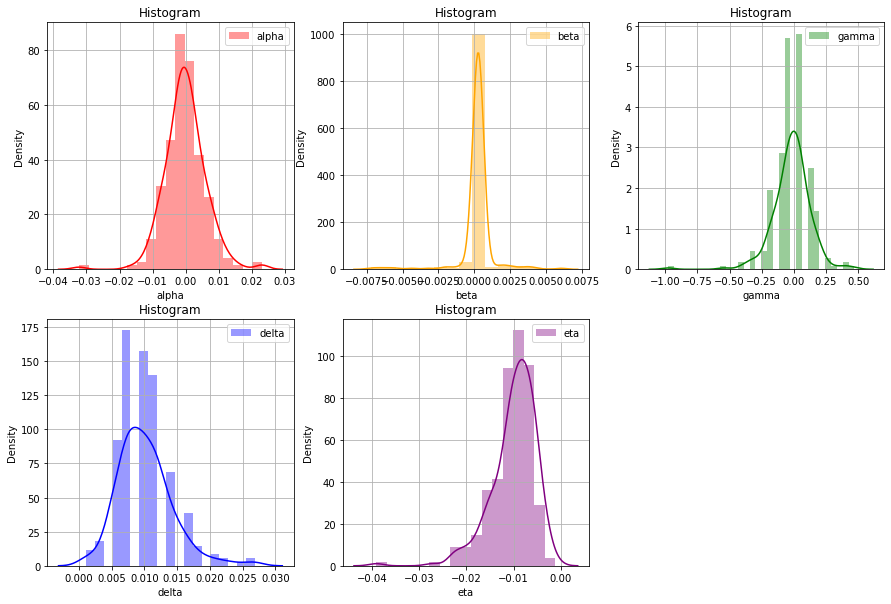

In [151]:
plt.figure(figsize = (15, 10))
for i, item in enumerate(df_discrete.columns[1:]):
    plt.subplot(2, 3, i+1)
    plt.title("Histogram")
    sns.distplot(df_discrete[item], color = colors[i], label = item)
    plt.legend()
    plt.grid(True)

plt.show()

## 1.5 模型估计

In [ ]:
a = np.array([2,3])
b = np.array([[1,2], [3,4]])
b

array([[1, 2],
       [3, 4]])

In [ ]:
b@a

array([ 8, 18])

In [ ]:
[[0 for i in [0, 1]] for j in [0, 1]]

[[0, 0], [0, 0]]